<a href="https://colab.research.google.com/github/halimahsitti/StudiIndependen/blob/main/Sitti_Halimah_PCA_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = {'feature_1': [random.uniform(0, 1) for i in range(100)],
        'feature_2': [random.uniform(0, 1) for i in range(100)],
        'feature_3': [random.uniform(0, 1) for i in range(100)],
        'feature_4': [random.uniform(0, 1) for i in range(100)],
        'feature_5': [random.uniform(0, 1) for i in range(100)],
        'feature_6': [random.uniform(0, 1) for i in range(100)],
        'feature_7': [random.uniform(0, 1) for i in range(100)],
        'feature_8': [random.uniform(0, 1) for i in range(100)],
        'feature_9': [random.uniform(0, 1) for i in range(100)],
        'feature_10': [random.uniform(0, 1) for i in range(100)],
        'label': [random.choice(['A', 'B', 'C']) for i in range(100)]}

df = pd.DataFrame(data)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,label
0,0.562372,0.056408,0.686746,0.437805,0.322859,0.995142,0.871069,0.985730,0.020159,0.359674,A
1,0.116990,0.698189,0.952567,0.568567,0.030602,0.354730,0.481618,0.297205,0.926258,0.281938,A
2,0.169498,0.137895,0.107605,0.860842,0.381340,0.135348,0.379835,0.870815,0.158593,0.519579,A
3,0.071222,0.813109,0.085149,0.809526,0.166683,0.387802,0.519556,0.769968,0.763320,0.577912,C
4,0.297191,0.750790,0.499548,0.782759,0.034271,0.695010,0.006124,0.155364,0.797905,0.314949,C


In [2]:
features = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']
x = df.loc[:, features].values

In [3]:
y = df.loc[:,['label']].values

In [4]:
pd.DataFrame(data = x, columns = features).head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.562372,0.056408,0.686746,0.437805,0.322859,0.995142,0.871069,0.985730,0.020159,0.359674
1,0.116990,0.698189,0.952567,0.568567,0.030602,0.354730,0.481618,0.297205,0.926258,0.281938
2,0.169498,0.137895,0.107605,0.860842,0.381340,0.135348,0.379835,0.870815,0.158593,0.519579
3,0.071222,0.813109,0.085149,0.809526,0.166683,0.387802,0.519556,0.769968,0.763320,0.577912
4,0.297191,0.750790,0.499548,0.782759,0.034271,0.695010,0.006124,0.155364,0.797905,0.314949


In [5]:
pca = PCA(n_components=2)

In [6]:
principalComponents = pca.fit_transform(x)

In [7]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [8]:
principalDf.head(5)

,principal component 1,principal component 2
0,0.219332,0.532695
1,-0.469798,-0.033749
2,0.107395,-0.340465
3,-0.438863,-0.317258
4,-0.850267,-0.150351


In [9]:
df[['label']].head()

,label
0,A
1,A
2,A
3,C
4,C


In [10]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,label
0,0.219332,0.532695,A
1,-0.469798,-0.033749,A
2,0.107395,-0.340465,A
3,-0.438863,-0.317258,C
4,-0.850267,-0.150351,C


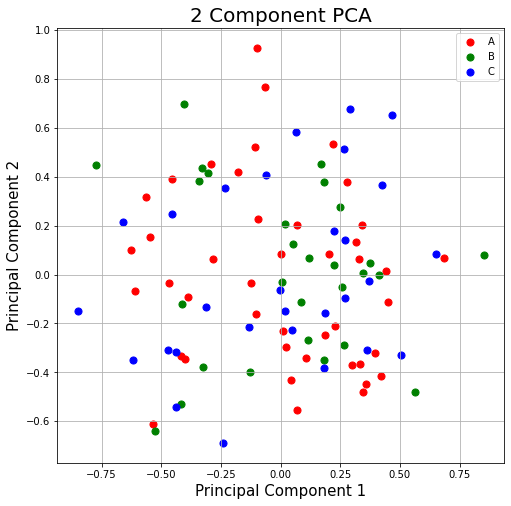

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['A', 'B', 'C']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()